In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [2]:
!pip install lightgbm --install-option=--gpu

/usr/local/lib/python3.7/dist-packages/pip/_internal/commands/install.py:232: UserWarning: Disabling all use of wheels due to the use of --build-option / --global-option / --install-option.
  cmdoptions.check_install_build_global(options)
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
songs = pd.read_csv('songs.csv')
train = pd.read_csv('train.csv')
members = pd.read_csv('members.csv')

In [5]:
songs.head()

,song_id,song_length,genre_ids,artist_name,composer,lyricist,language
0,CXoTN1eb7AI+DntdU1vbcwGRV4SCIDxZu+YD8JP8r4E=,247640.0,465,張信哲 (Jeff Chang),董貞,何啟弘,3.0
1,o0kFgae9QtnYgRkVPqLJwa05zIhRlUjfF7O1tDw0ZDU=,197328.0,444,BLACKPINK,TEDDY| FUTURE BOUNCE| Bekuh BOOM,TEDDY,31.0
2,DwVvVurfpuz+XPuFvucclVQEyPqcpUkHR0ne1RQzPs0=,231781.0,465,SUPER JUNIOR,NaN,NaN,31.0
3,dKMBWoZyScdxSkihKG+Vf47nc18N9q4m58+b4e7dSSE=,273554.0,465,S.H.E,湯小康,徐世珍,3.0
4,W3bqWd3T+VeHFzHAUfARgW9AvVRaF4N5Yzm4Mr6Eo/o=,140329.0,726,貴族精選,Traditional,Traditional,52.0


In [6]:
songs.describe()

,song_length,language
count,1.056540e+05,105654.000000
mean,2.465394e+05,26.366820
std,1.298271e+05,23.328304
min,1.253000e+03,-1.000000
25%,1.995630e+05,3.000000
50%,2.336850e+05,24.000000
75%,2.731360e+05,52.000000
max,6.448901e+06,59.000000


In [7]:
train.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1.0
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,1.0
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist,1.0
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,my library,Local playlist more,local-playlist,1.0
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,explore,Explore,online-playlist,1.0


In [8]:
train.describe()

,target
count,70271.000000
mean,0.756514
std,0.429189
min,0.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,1.000000


In [9]:
members.head()

,msno,city,bd,gender,registered_via,registration_init_time,expiration_date
0,XQxgAYj3klVKjR3oxPPXYYFp4soD4TuBghkhMTD4oTw=,1,0,NaN,7,20110820,20170920
1,UizsfmJb9mV54qE9hCYyU07Va97c0lCRLEQX3ae+ztM=,1,0,NaN,7,20150628,20170622
2,D8nEhsIOBSoE6VthTaqDX8U6lqjJ7dLdr72mOyLya2A=,1,0,NaN,4,20160411,20170712
3,mCuD+tZ1hERA/o5GPqk38e041J8ZsBaLcu7nGoIIvhI=,1,0,NaN,9,20150906,20150907
4,q4HRBfVSssAFS9iRfxWrohxuk9kCYMKjHOEagUMV6rQ=,1,0,NaN,4,20170126,20170613


In [10]:
members.describe()

,city,bd,registered_via,registration_init_time,expiration_date
count,34403.000000,34403.000000,34403.000000,3.440300e+04,3.440300e+04
mean,5.371276,12.280935,5.953376,2.013994e+07,2.016901e+07
std,6.243929,18.170251,2.287534,2.954015e+04,7.320925e+03
min,1.000000,-43.000000,3.000000,2.004033e+07,1.970010e+07
25%,1.000000,0.000000,4.000000,2.012103e+07,2.017020e+07
50%,1.000000,0.000000,7.000000,2.015090e+07,2.017091e+07
75%,10.000000,25.000000,9.000000,2.016110e+07,2.017093e+07
max,22.000000,1051.000000,16.000000,2.017023e+07,2.020102e+07


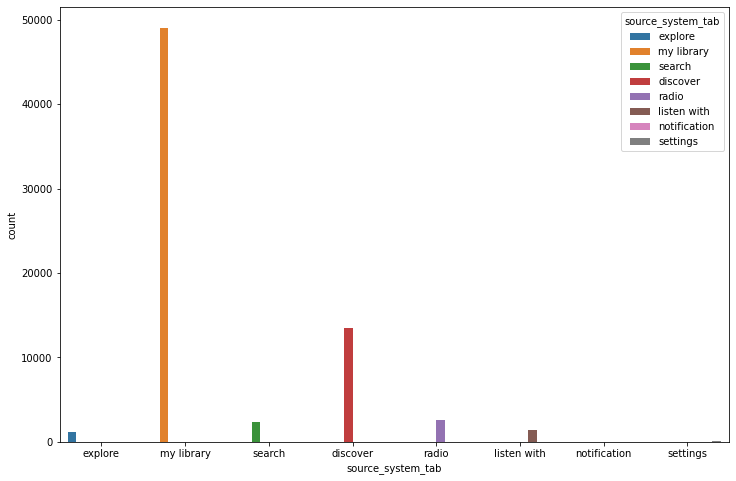

In [11]:
plt.figure(figsize = (12 , 8))
sns.countplot(x='source_system_tab', hue='source_system_tab', data=train)

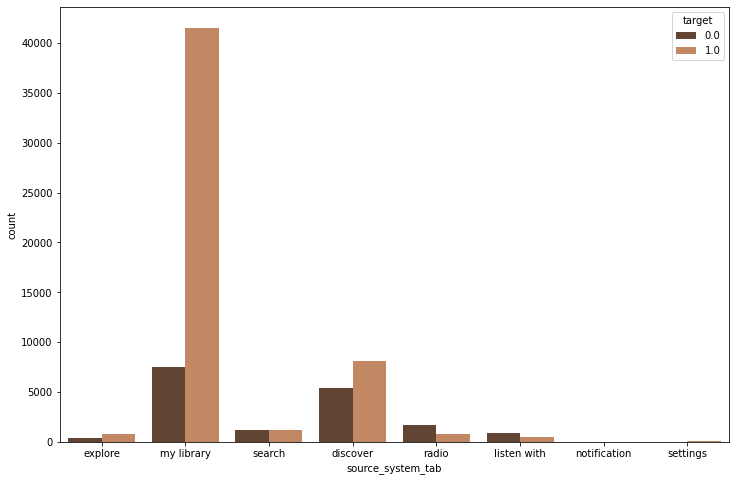

In [12]:
plt.figure(figsize = (12 , 8))
sns.countplot(x='source_system_tab' , hue='target' , data=train , palette = 'copper')

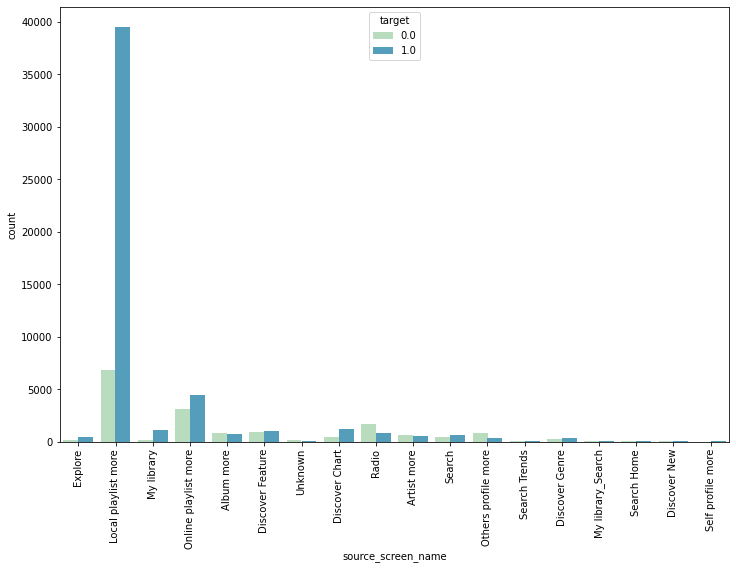

In [13]:
plt.figure(figsize = (12 , 8))
plt.xticks(rotation = 90)
sns.countplot(x = 'source_screen_name', hue = 'target' , data = train , palette = 'GnBu')

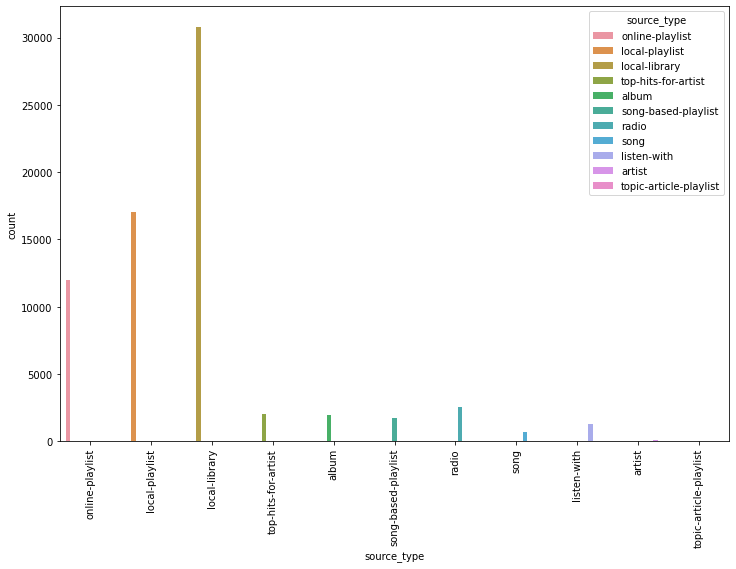

In [14]:
plt.figure(figsize=(12 , 8))
plt.xticks(rotation = 90)
sns.countplot(x = 'source_type' , hue = 'source_type' , data = train)

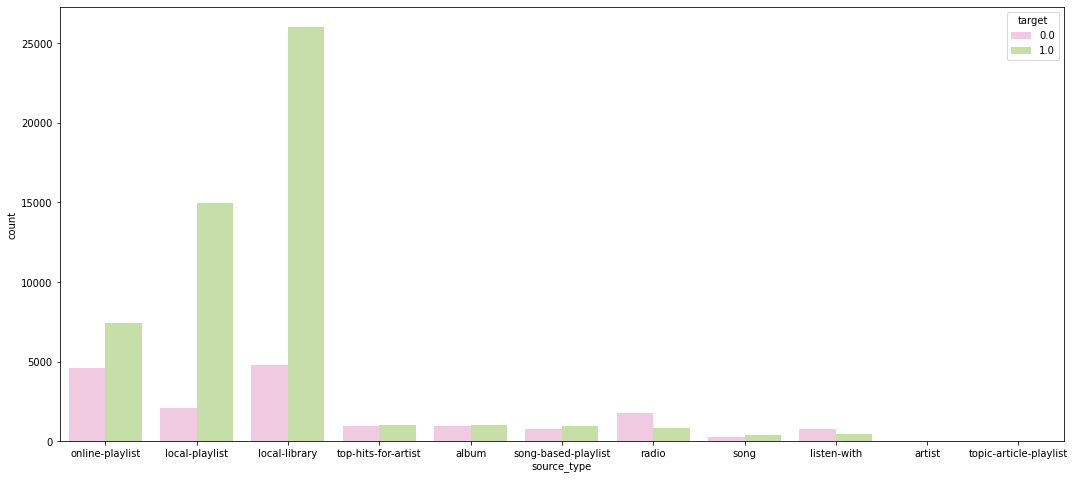

In [15]:
plt.figure(figsize = (18, 8))
sns.countplot(x = 'source_type', hue = 'target' , data = train , palette = 'PiYG')

In [17]:
ntr = 7000
nts = 2801
names=['msno','song_id','source_system_tab','source_screen_name','source_type','target']
test1 = pd.read_csv('train.csv',names=names,skiprows=ntr,nrows=nts)
test = test1.drop(['target'],axis=1)
ytr = np.array(test1['target'])
test_name = ['id','msno','song_id','source_system_tab','source_screen_name','source_type']
test['id']=np.arange(nts)
test = test[test_name]
song_cols = ['song_id', 'artist_name', 'genre_ids', 'song_length', 'language']
train = train.merge(songs[song_cols], on='song_id', how='left')
test = test.merge(songs[song_cols], on='song_id', how='left')
members['registration_year'] = members['registration_init_time'].apply(lambda x: int(str(x)[0:4]))
members['registration_month'] = members['registration_init_time'].apply(lambda x: int(str(x)[4:6]))
members['registration_date'] = members['registration_init_time'].apply(lambda x: int(str(x)[6:8]))
members = members.drop(['registration_init_time'], axis=1)
members_cols = members.columns
train = train.merge(members[members_cols], on='msno', how='left')
test = test.merge(members[members_cols], on='msno', how='left')
train = train.fillna(-1)
test = test.fillna(-1)
import gc
del members, songs; gc.collect();
cols = list(train.columns)
cols.remove('target')
for col in tqdm(cols):
    if train[col].dtype == 'object':
        train[col] = train[col].apply(str)
        test[col] = test[col].apply(str)
        le = LabelEncoder()
        train_vals = list(train[col].unique())
        test_vals = list(test[col].unique())
        le.fit(train_vals + test_vals)
        train[col] = le.transform(train[col])
        test[col] = le.transform(test[col])

100%|██████████| 17/17 [00:00<00:00, 39.30it/s]


In [18]:
import lightgbm as lgb
X = np.array(train.drop(['target'], axis=1))
y = train['target'].values
X_test = np.array(test.drop(['id'], axis=1))
ids = test['id'].values
# garbage collection
del train, test; gc.collect();
# Spliting Dataset into Training and Testing Dataset in ratio 85:15 respectively
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.15, random_state = 12)
#garbage collection
del X, y; gc.collect();
d_train = lgb.Dataset(X_train, label=y_train)
d_valid = lgb.Dataset(X_valid, label=y_valid) 
watchlist = [d_train, d_valid]

In [19]:
# function for ML model
def predict(m1_model):
    model = m1_model.fit(X_train,y_train)
    print('Training Score : {}'.format(model.score(X_train,y_train)))
    y_pred = model.predict(X_valid)
    v_test = model.predict(X_test)
    yhat = (v_test>0.5).astype(int)
    comp = (yhat==ytr).astype(int)
    acc = comp.sum()/comp.size*100
    print("Accuracy on test data for the model", acc)

In [20]:
# check accuracy of the model by calling predict function
predict(LogisticRegression())

Training Score : 0.7565753126517218
Accuracy on test data for the model 75.0089253837915


In [21]:
# set parameters for the model
params = {}
params['learning_rate'] = 0.4
params['application'] = 'binary'
params['max_depth'] = 15
params['num_leaves'] = 2**8
params['verbosity'] = 0
params['metric'] = 'auc'
params['max_bin'] = 255
# training dataset
model1 = lgb.train(params, train_set=d_train, num_boost_round=300, valid_sets=watchlist, early_stopping_rounds=10, verbose_eval=10)

Training until validation scores don't improve for 10 rounds.
[10]	training's auc: 0.919624	valid_1's auc: 0.867108
[20]	training's auc: 0.951741	valid_1's auc: 0.871744
[30]	training's auc: 0.968702	valid_1's auc: 0.872584
Early stopping, best iteration is:
[29]	training's auc: 0.9673	valid_1's auc: 0.873349


In [22]:
# Predict Model
p_test = model1.predict(X_test)
yhat = (p_test>0.5).astype(int)
comp = (yhat==ytr).astype(int)
acc = comp.sum()/comp.size*100
# Print Model Accuracy
print('The accuracy of lgbm model on test data is: {0:f}%'.format(acc))

The accuracy of lgbm model on test data is: 90.039272%
